In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu
flow_dataset = pd.read_csv('/content/drive/MyDrive/Sdn_data/FlowStatsfile.csv')

# Xử lý dữ liệu: thay dấu chấm trong các cột IP (nếu là chuỗi)
flow_dataset.iloc[:, 2] = flow_dataset.iloc[:, 2].str.replace('.', '', regex=False)
flow_dataset.iloc[:, 3] = flow_dataset.iloc[:, 3].str.replace('.', '', regex=False)
flow_dataset.iloc[:, 5] = flow_dataset.iloc[:, 5].str.replace('.', '', regex=False)

# Chuẩn bị dữ liệu
X_flow = flow_dataset.iloc[:, :-1].values
X_flow = X_flow.astype('float64')
y_flow = flow_dataset.iloc[:, -1].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_flow = scaler.fit_transform(X_flow)

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)

# Huấn luyện mô hình MLP
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=1, max_iter=500)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Đánh giá độ chính xác
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Train Accuracy: {:.2f}%".format(accuracy_score(y_train, y_pred_train) * 100))

# Lưu model
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(model, f)

#with open('scaler.pkl', 'wb') as f:
#    pickle.dump(scaler, f)

Confusion Matrix:
 [[ 71472     39]
 [     1 190632]]
Test Accuracy: 99.98%
Train Accuracy: 99.99%


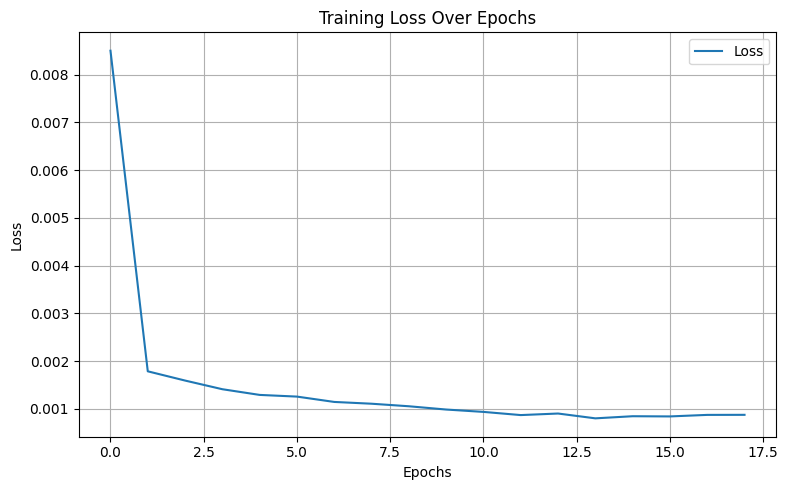

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(model.loss_curve_, label='Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


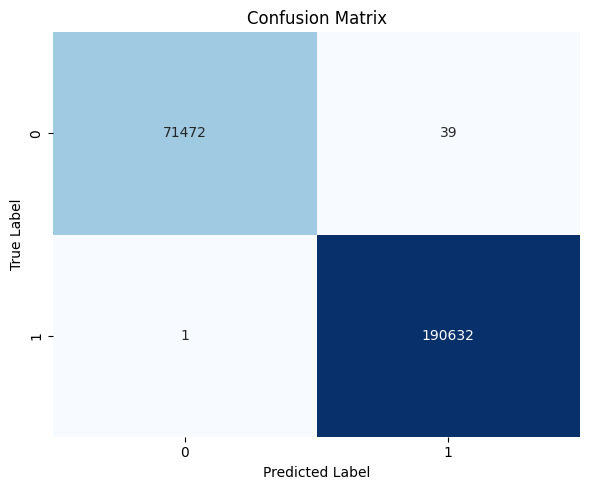

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
